# Generating WordClouds in Python

## What is WordCloud?

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud. For this tutorial, you will learn how to create a WordCloud of your own in Python and customize it as you see fit. This tool will be quite handy for exploring text data and making your report more lively.

In this tutorial we will use a  [wine review dataset](https://www.kaggle.com/zynicide/wine-reviews) taking from Wine Enthusiast website to learn:

- How to create a basic wordcloud from one to several text documents
- Adjust color, size and number of text inside your wordcloud
- Mask your wordcloud into any shape of your choice
- Mask your wordcloud into any color pattern of your choice

## Visualization

Start with loading all the necessary libraries:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

Now, using pandas read_csv to load in the dataframe. Notice the use of index_col=0 meaning we don't read in row name (index) as a separated column.

In [ ]:
# Load in the dataframe
df = pd.read_csv("https://raw.githubusercontent.com/davestroud/Wine/master/winemag-data-130k-v2.csv", index_col=0)

In [ ]:
# Looking at first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


You can printout some basic information about the dataset using print() combined with .format() to have a nice printout.

In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()), 
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()), 
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [ ]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


To make comparisons between groups of a feature, you can use groupby() and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistics for all countries' points and price or select the most popular and expensive ones.

In [ ]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                       ... price               
                         count       mean       std  ...   50%    75%     max
country                                              ...                     
Argentina               3800.0  86.710263  3.179627  ...  17.0  25.00   230.0
Armenia                    2.0  87.500000  0.707107  ...  14.5  14.75    15.0
Australia               2329.0  88.580507  2.989900  ...  21.0  38.00   850.0
Austria                 3345.0  90.101345  2.499799  ...  25.0  36.50  1100.0
Bosnia and Herzegovina     2.0  86.500000  2.121320  ...  12.5  12.75    13.0

[5 rows x 16 columns]

This selects the top 5 highest average points among all 44 countries:

In [ ]:
country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


You can plot the number of wines by country using the plot method of Pandas DataFrame and Matplotlib. If you are not familiar with Matplotlib, I suggest taking a quick look at this tutorial.

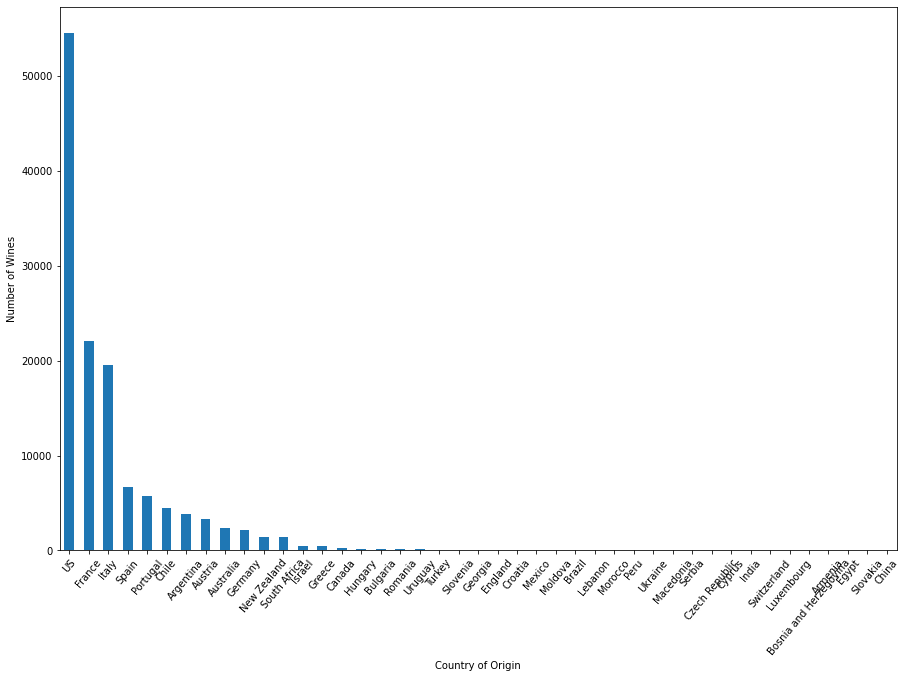

In [ ]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Among 44 countries producing wine, US has more than 50,000 types of wine in the wine review dataset, twice as much as the next one in the rank: France - the country famous for its wine. Italy also produces a lot of quality wine, having nearly 20,000 wines open to review.

**Does quantity over quality?**

Let's now take a look at the plot of all 44 countries by its highest rated wine, using the same plotting technique as above:

In [ ]:
country.max

<bound method GroupBy.max of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fd72c8abf28>>

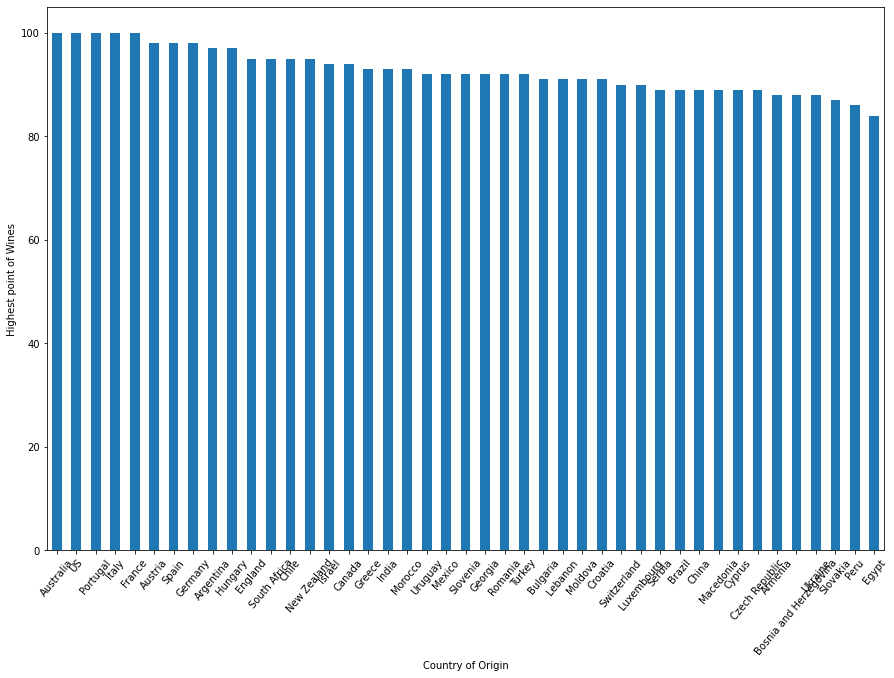

In [ ]:
plt.figure(figsize=(15,10))
country.max(numeric_only=True, min_count=-1).sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Australia, US, Portugal, Italy, and France all have 100 points wine. If you notice, Portugal ranks 5th and Australia ranks 9th in the number of wines produces in the dataset, and both countries have less than 8000 types of wine.
That's a little bit of data exploration to get to know the dataset that you are using today. Now you will start to dive into the main course of the meal: WordCloud.

## Set up a basic WordCloud

WordCloud is a technique to show which words are the most frequent among the given text. The first thing you may want to do before using any functions is check out the docstring of the function, and see all required and optional arguments. To do so, type ?function and run it to get all information.

In [ ]:
?WordCloud

You can see that the only required argument for a WordCloud object is the text, while all others are optional.

So let's start with a simple example: using the first observation description as the input for the wordcloud. The three steps are:

- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

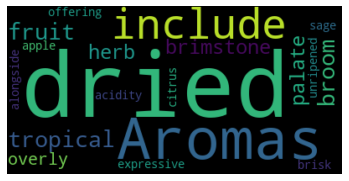

In [ ]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Great! You can see that the first review mentioned a lot about dried flavors and the aromas of the wine.

Now, change some optional arguments of the WordCloud like max_font_size, max_word, and background_color.

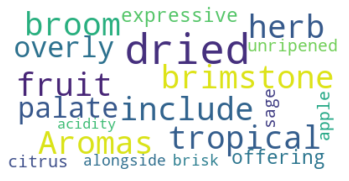

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Ugh, it seems like max_font_size here might not be a good idea. It makes it more difficult to see the differences between word frequencies. However, brightening the background makes the cloud easier to read.

If you want to save the image, WordCloud provides a function to_file

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

You've probably noticed the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. For more information about the choice, here is a helpful link to explore more about this choice.

So now you'll combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [ ]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


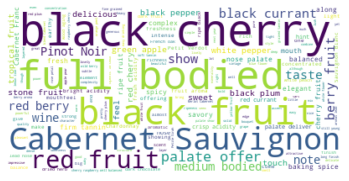

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ohhh, it seems like black cherry and full-bodied are the most mentioned characteristics, and Cabernet Sauvignon is the most popular of them all. This aligns with the fact that Cabernet Sauvignon "is one of the world's most widely recognized red wine grape varieties. It is grown in nearly every major wine producing country among a diverse spectrum of climates from Canada's Okanagan Valley to Lebanon's Beqaa Valley".[1]

Now, let's pour these words into a cup of wine!
Seriously,
Even a bottle of wine if you wish!

In order to create a shape for your wordcloud, first, you need to find a PNG file to become the mask. Below is a nice one that is available on the internet:

In [ ]:
wine_mask = np.array(Image.open("wine.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

First, you use the transform_format() function to swap number 0 to 255.

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

Now, you have a new mask in the correct form. Printout the transformed mask is the best way to check if the function works fine.

In [ ]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

Okay! With the right mask, you can start making the wordcloud with your selected shape. Notice in the WordCloud function, there is a mask argument that takes in the transformed mask that you created above. The contour_width and contour_color are, as their name, arguments to adjust the outline characteristics of the cloud. The wine bottle you have here is a red wine bottle, so firebrick seems like a good choice for contour color. For more choice of color, you can take a look at this [color code table](https://matplotlib.org/2.0.0/examples/color/named_colors.html)

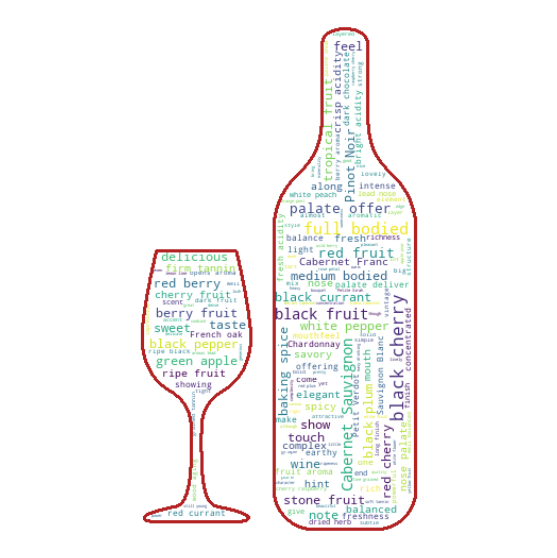

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Voila! You created a wordcloud in the shape of a wine bottle! It seems like wine descriptions most often mention about black cherry, fruit flavors and full-bodied characteristics of the wine. Now let's take a closer look at the reviews for each country and plot the wordcloud using each country flag.



## Creating wordcloud following a color pattern

You can combine all the reviews of five countries that have the most wines. To find those countries, you can either look at the plot country vs number of wine above or use the group that you got above to find the number of observations for each country (each group) and sort_values() with argument ascending=False to sort descending.

In [ ]:
country.size().sort_values(ascending=False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

So now you have 5 top countries: US, France, Italy, Spain, and Portugal. You can change the number of countries by putting your choice number insider head() like below

In [ ]:
country.size().sort_values(ascending=False).head(10)

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
dtype: int64

For now, 5 countries should be enough.

To get all review for each country, you can concatenate all of the reviews using the " ".join(list) syntax, which joins all elements in a list separating them by whitespace.

In [ ]:
# Join all reviews of each country:
usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)

Then, creating the wordcloud as above. You can combine the two steps of creating and generate into one as below. The color mapping is done right before you plot the cloud using the ImageColorGenerator function from WordCloud library.

First, try with US Flag:


<img src = "https://i.imgur.com/RLL6xzn.png" align = "center">


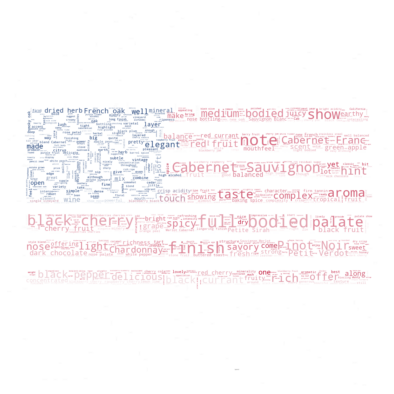

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("US.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("us_wine.png", format="png")

plt.show()

Looks good! Now let's repeat with a review from France.

<img src = "https://i.imgur.com/lPYs0YP.jpg" align = "center">

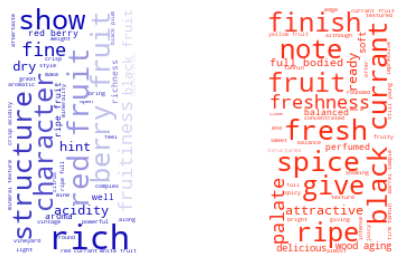

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("france.jpg"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(fra)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("fra_wine.png", format="png")

#plt.show()

Please note that you should save the image after plotting to have the wordcloud with the desired color pattern.

Try Italy:

<img src = "https://i.imgur.com/XFzHA0z.jpg" align = "center">

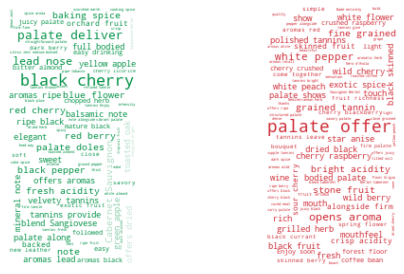

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("italy.jpg"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(ita)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("ita_wine.png", format="png")

Spain flag:
<img src = "https://i.imgur.com/kx8GQV1.jpg" align = "center">

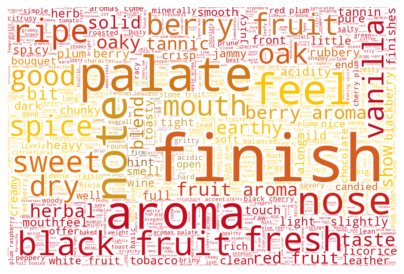

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("spain.jpg"))
wordcloud_spa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(spa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("spa_wine.png", format="png")
#plt.show()

Lastly, Portugal:
<img src = "https://i.imgur.com/vg7ttWG.jpg" align = "center">

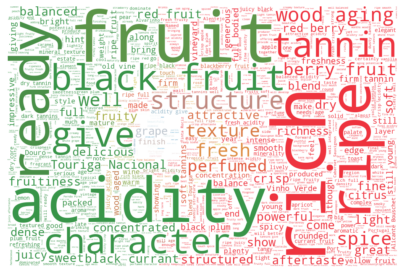

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("portugal.jpg"))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(por)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("por_wine.png", format="png")
#plt.show()

## Congratulations!

You made it! You have learned several ways to draw a WordCloud that would be helpful for visualization of any text analysis. You also learn how to mask the cloud into any shape, using any color of your choice.

### Reference : https://www.datacamp.com/community/tutorials/wordcloud-python